In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('final_dataset.csv')
data

,year,İBBS3,city,population,total_cases,carried_over_from,opened_inside_year,finished,carried_over_to,returned,area
0,2021,TR100,İstanbul,15099946.0,2378387,1536743,841644,836525,1541862,12697,5461
1,2021,TR211,Tekirdağ,1105759.0,127163,59444,67719,62603,64560,516,6190
2,2021,TR212,Edirne,406215.0,50363,24888,25475,27064,23299,457,6145
3,2021,TR213,Kırklareli,363245.0,31716,12732,18984,18939,12777,215,6459
4,2021,TR221,Balıkesir,1238619.0,139589,66047,73542,74267,65322,913,14583
...,...,...,...,...,...,...,...,...,...,...,...
1048,2009,TRC22,Diyarbakır,1514793.0,89211,47222,41989,38964,50247,602,15101
1049,2009,TRC31,Mardin,736455.0,24841,7067,17774,15843,8998,390,8780
1050,2009,TRC32,Batman,497841.0,22390,8826,13564,13984,8406,189,4477
1051,2009,TRC33,Şırnak,430006.0,13615,3692,9923,9707,3908,47,7078


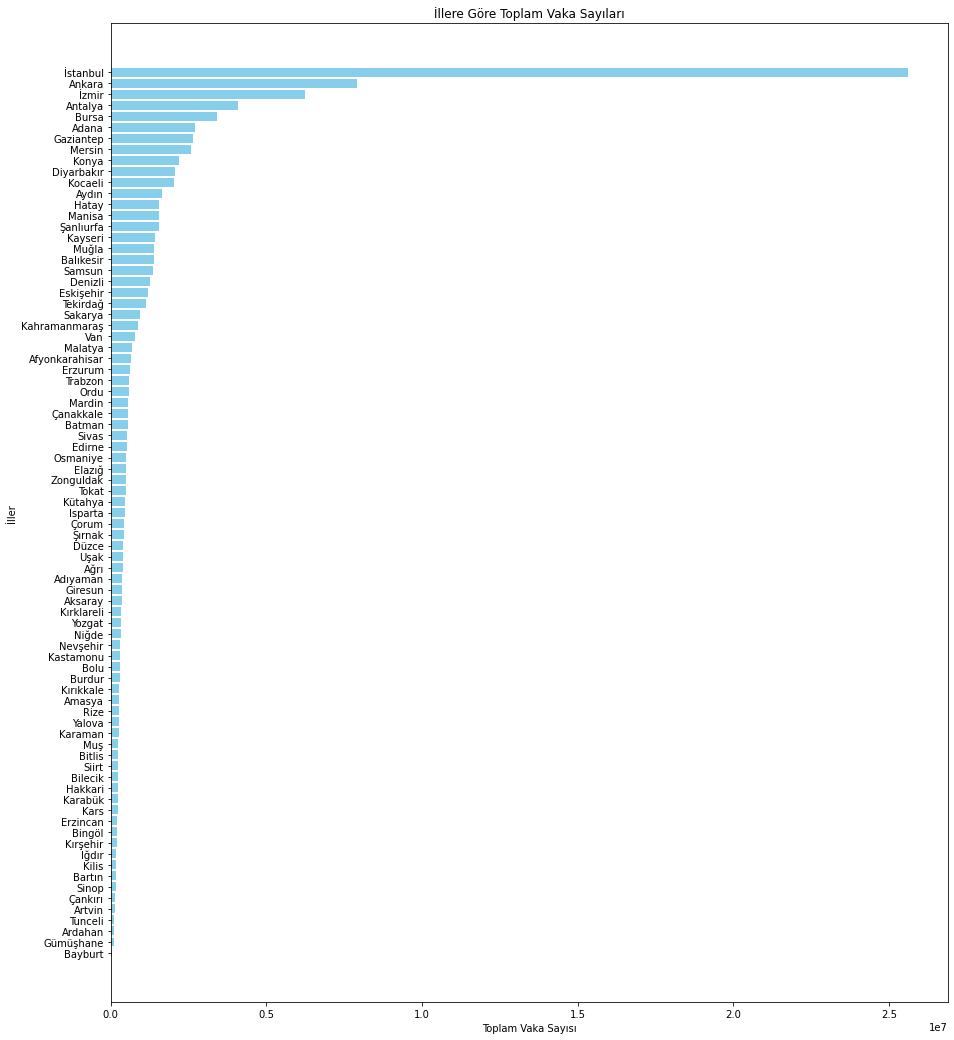

In [5]:
# Şehir bazında toplam vaka sayısını hesapla ve sıralayarak veriyi hazırlayalım
city_data = data.groupby('city')['total_cases'].sum().reset_index()
city_data = city_data.sort_values(by='total_cases', ascending=False)

# İllere göre toplam vaka sayılarını gösteren bar grafiği
plt.figure(figsize=(15,18))
plt.barh(city_data['city'], city_data['total_cases'], color='skyblue')
plt.title('İllere Göre Toplam Vaka Sayıları')
plt.xlabel('Toplam Vaka Sayısı')
plt.ylabel('İller')
plt.gca().invert_yaxis()
plt.show()


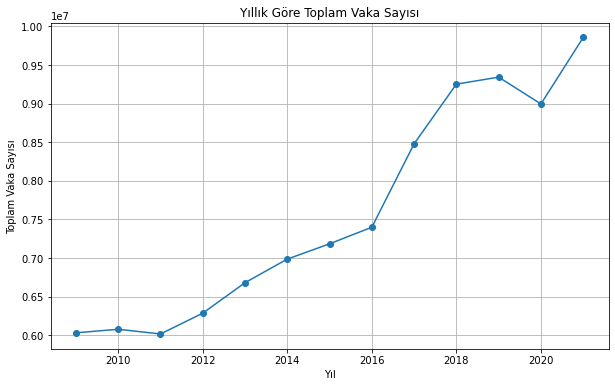

In [6]:
yearly_data = data.groupby('year')['total_cases'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_data['year'], yearly_data['total_cases'], marker='o')
plt.title('Yıllık Göre Toplam Vaka Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Vaka Sayısı')
plt.grid(True)
plt.show()


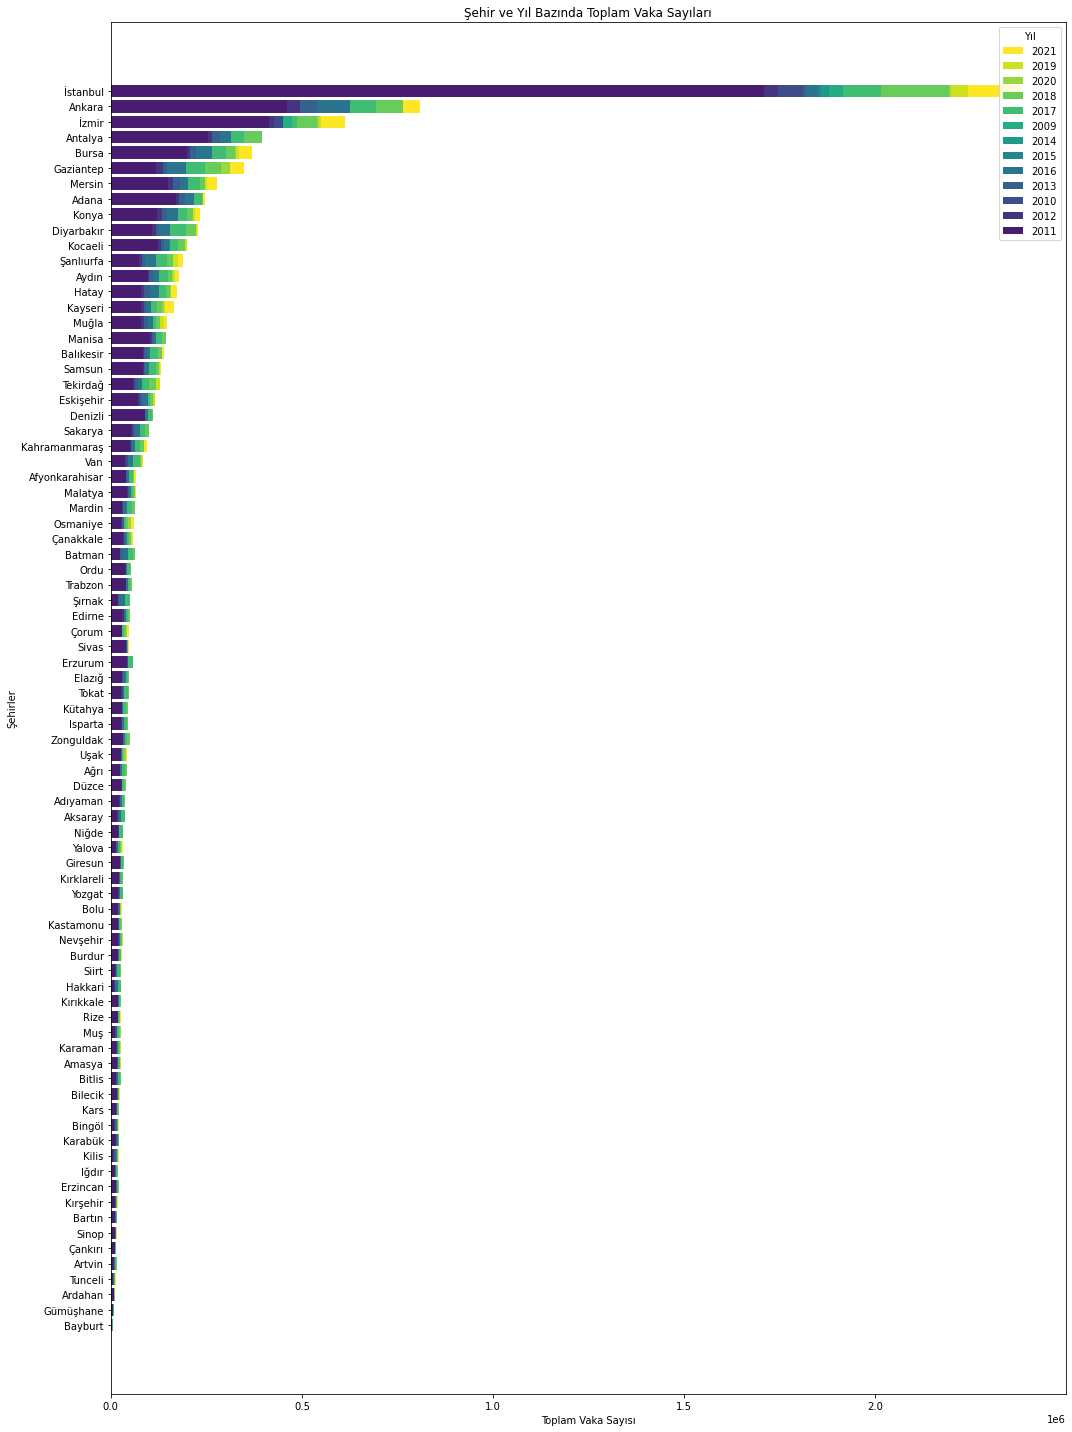

In [7]:
# Şehir ve yıl bazında toplam vaka sayısını hesaplayarak sıralama
city_year_data = data.groupby(['year', 'city'])['total_cases'].sum().reset_index()
city_year_data = city_year_data.sort_values(by=['total_cases'], ascending=False)

# Yılların listesi
years = city_year_data['year'].unique()

# Grafik boyutunu ayarlama
plt.figure(figsize=(15, 20))

# Renk listesi
colors = plt.cm.viridis_r([i/len(years) for i in range(len(years))])

# Tüm yılları tek bir grafik üzerinde gösterme
for i, year in enumerate(years):
    yearly_data = city_year_data[city_year_data['year'] == year]
    plt.barh(yearly_data['city'], yearly_data['total_cases'], color=colors[i], label=year)

plt.title('Şehir ve Yıl Bazında Toplam Vaka Sayıları')
plt.xlabel('Toplam Vaka Sayısı')
plt.ylabel('Şehirler')
plt.legend(title='Yıl', loc='upper right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


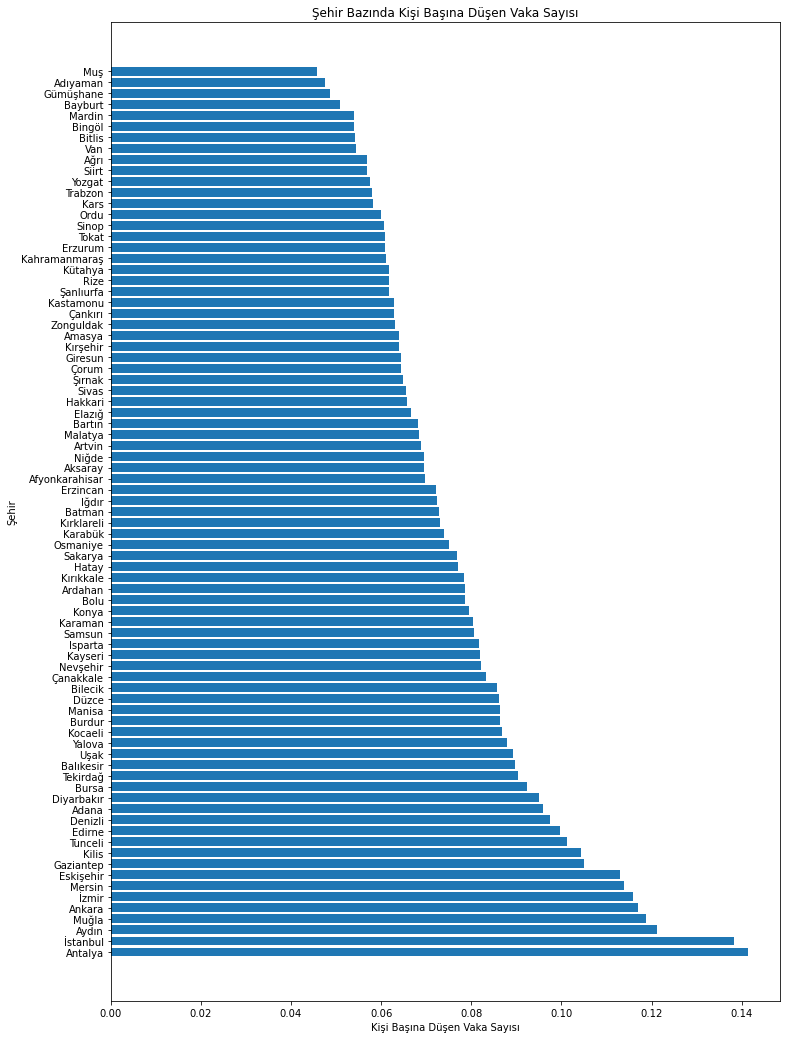

In [8]:
data['cases_per_capita'] = data['total_cases'] / data['population']
city_data = data.groupby('city')['cases_per_capita'].mean().reset_index()
city_data = city_data.sort_values(by='cases_per_capita', ascending=False)
plt.figure(figsize=(12,18))
plt.barh(city_data['city'], city_data['cases_per_capita'])
plt.title('Şehir Bazında Kişi Başına Düşen Vaka Sayısı')
plt.xlabel('Kişi Başına Düşen Vaka Sayısı')
plt.ylabel('Şehir')
plt.show()


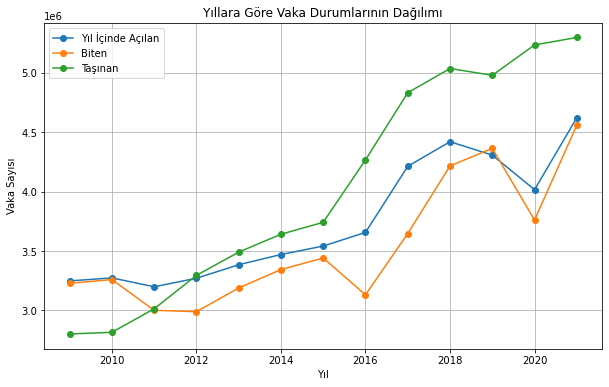

In [9]:
yearly_status = data.groupby('year')[['opened_inside_year', 'finished', 'carried_over_to']].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_status['year'], yearly_status['opened_inside_year'], marker='o', label='Yıl İçinde Açılan')
plt.plot(yearly_status['year'], yearly_status['finished'], marker='o', label='Biten')
plt.plot(yearly_status['year'], yearly_status['carried_over_to'], marker='o', label='Taşınan')
plt.title('Yıllara Göre Vaka Durumlarının Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Vaka Sayısı')
plt.legend()
plt.grid(True)
plt.show()


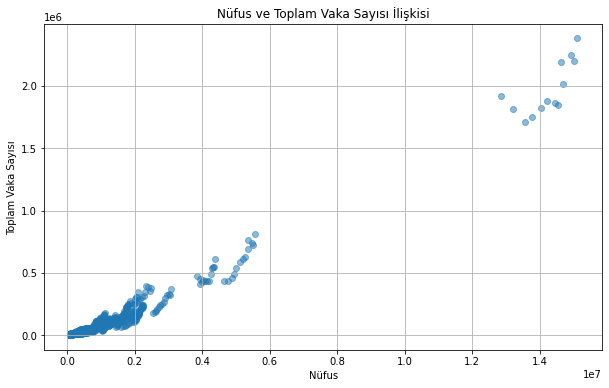

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(data['population'], data['total_cases'], alpha=0.5)
plt.title('Nüfus ve Toplam Vaka Sayısı İlişkisi')
plt.xlabel('Nüfus')
plt.ylabel('Toplam Vaka Sayısı')
plt.grid(True)
plt.show()



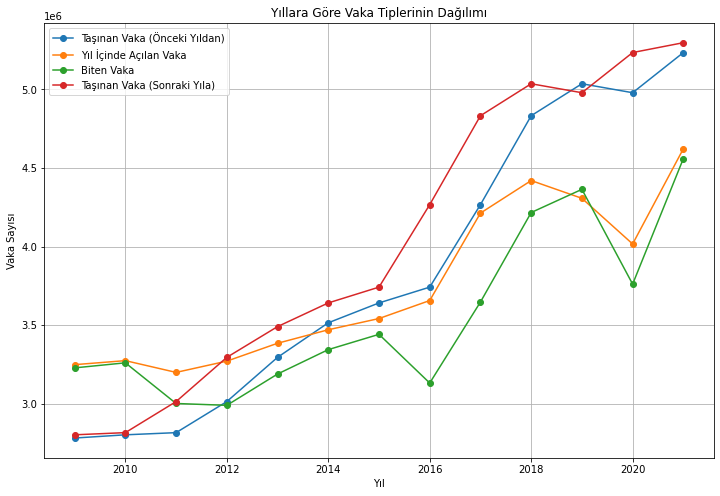

In [11]:
yearly_status = data.groupby('year')[['carried_over_from', 'opened_inside_year', 'finished', 'carried_over_to']].sum().reset_index()
plt.figure(figsize=(12,8))
plt.plot(yearly_status['year'], yearly_status['carried_over_from'], marker='o', label='Taşınan Vaka (Önceki Yıldan)')
plt.plot(yearly_status['year'], yearly_status['opened_inside_year'], marker='o', label='Yıl İçinde Açılan Vaka')
plt.plot(yearly_status['year'], yearly_status['finished'], marker='o', label='Biten Vaka')
plt.plot(yearly_status['year'], yearly_status['carried_over_to'], marker='o', label='Taşınan Vaka (Sonraki Yıla)')
plt.title('Yıllara Göre Vaka Tiplerinin Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Vaka Sayısı')
plt.legend()
plt.grid(True)
plt.show()


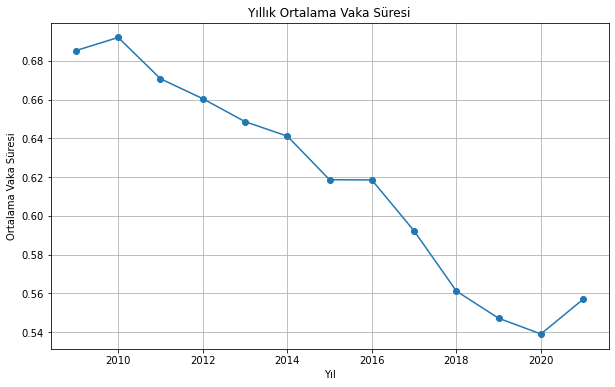

In [12]:
data['average_case_duration'] = (data['finished'] + data['carried_over_to'] - data['carried_over_from']) / data['total_cases']
yearly_duration = data.groupby('year')['average_case_duration'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_duration['year'], yearly_duration['average_case_duration'], marker='o')
plt.title('Yıllık Ortalama Vaka Süresi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Vaka Süresi')
plt.grid(True)
plt.show()


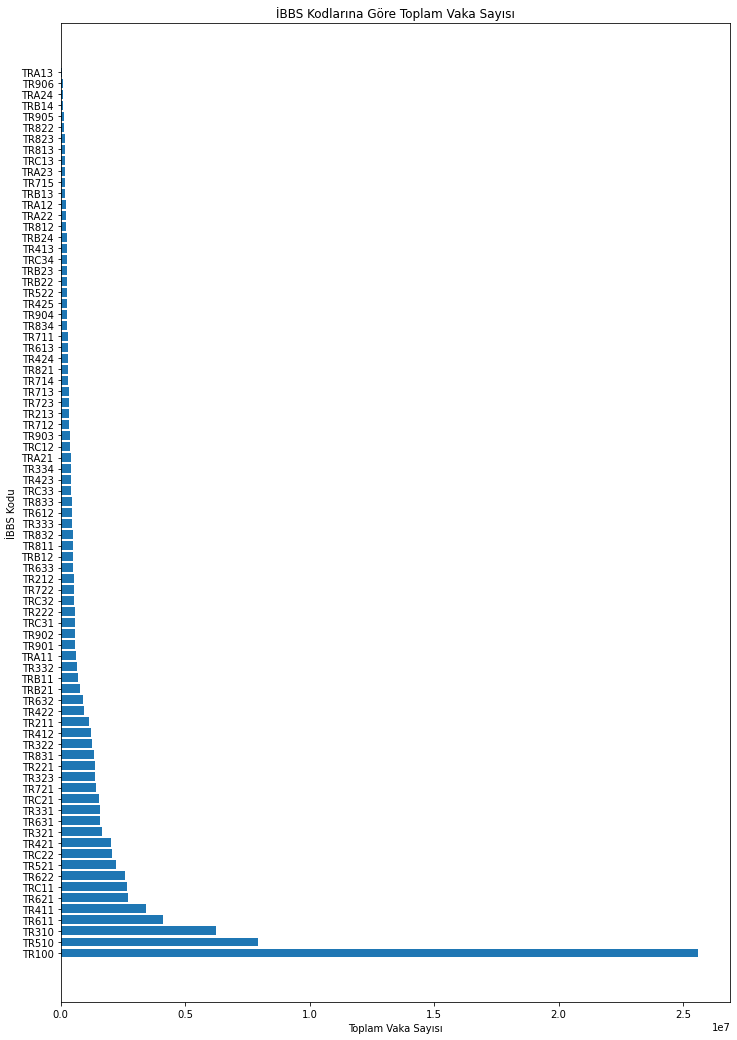

In [13]:
ibbs_data = data.groupby('İBBS3')['total_cases'].sum().reset_index()
ibbs_data = ibbs_data.sort_values(by='total_cases', ascending=False)
plt.figure(figsize=(12,18))
plt.barh(ibbs_data['İBBS3'], ibbs_data['total_cases'])
plt.title('İBBS Kodlarına Göre Toplam Vaka Sayısı')
plt.xlabel('Toplam Vaka Sayısı')
plt.ylabel('İBBS Kodu')
plt.show()


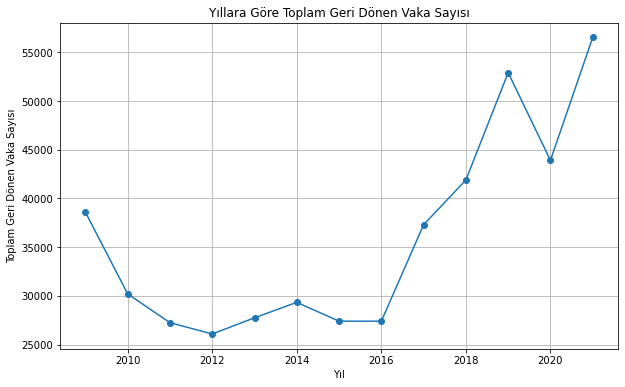

In [14]:
yearly_returned = data.groupby('year')['returned'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_returned['year'], yearly_returned['returned'], marker='o')
plt.title('Yıllara Göre Toplam Geri Dönen Vaka Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Geri Dönen Vaka Sayısı')
plt.grid(True)
plt.show()


In [15]:
# İBBS3, total_cases and returned columns are not useful

data = data.drop(columns=['İBBS3', 'returned'])
data


,year,city,population,total_cases,carried_over_from,opened_inside_year,finished,carried_over_to,area,cases_per_capita,average_case_duration
0,2021,İstanbul,15099946.0,2378387,1536743,841644,836525,1541862,5461,0.157510,0.353872
1,2021,Tekirdağ,1105759.0,127163,59444,67719,62603,64560,6190,0.115001,0.532537
2,2021,Edirne,406215.0,50363,24888,25475,27064,23299,6145,0.123981,0.505828
3,2021,Kırklareli,363245.0,31716,12732,18984,18939,12777,6459,0.087313,0.598562
4,2021,Balıkesir,1238619.0,139589,66047,73542,74267,65322,14583,0.112697,0.526847
...,...,...,...,...,...,...,...,...,...,...,...
1048,2009,Diyarbakır,1514793.0,89211,47222,41989,38964,50247,15101,0.058893,0.470671
1049,2009,Mardin,736455.0,24841,7067,17774,15843,8998,8780,0.033731,0.715511
1050,2009,Batman,497841.0,22390,8826,13564,13984,8406,4477,0.044974,0.605806
1051,2009,Şırnak,430006.0,13615,3692,9923,9707,3908,7078,0.031662,0.728828


In [16]:
# Transform the year column to time_since_event in order for machine to understand the year concept
current_year = 2024
data['time_since_event'] = current_year - data['year']

# Drop the 'year' column
data.drop('year', axis=1, inplace=True)

# Add the population density column
data['population_density'] = data['population'] / data['area']

# Drop the 'area' column
data.drop('area', axis=1, inplace=True)

data.to_csv('processed_dataset.csv', index=False)
data

,city,population,total_cases,carried_over_from,opened_inside_year,finished,carried_over_to,cases_per_capita,average_case_duration,time_since_event,population_density
0,İstanbul,15099946.0,2378387,1536743,841644,836525,1541862,0.157510,0.353872,3,2765.051456
1,Tekirdağ,1105759.0,127163,59444,67719,62603,64560,0.115001,0.532537,3,178.636349
2,Edirne,406215.0,50363,24888,25475,27064,23299,0.123981,0.505828,3,66.104963
3,Kırklareli,363245.0,31716,12732,18984,18939,12777,0.087313,0.598562,3,56.238582
4,Balıkesir,1238619.0,139589,66047,73542,74267,65322,0.112697,0.526847,3,84.935816
...,...,...,...,...,...,...,...,...,...,...,...
1048,Diyarbakır,1514793.0,89211,47222,41989,38964,50247,0.058893,0.470671,15,100.310774
1049,Mardin,736455.0,24841,7067,17774,15843,8998,0.033731,0.715511,15,83.878702
1050,Batman,497841.0,22390,8826,13564,13984,8406,0.044974,0.605806,15,111.199687
1051,Şırnak,430006.0,13615,3692,9923,9707,3908,0.031662,0.728828,15,60.752472


In [17]:
# Linear Regression example for opened_inside_year:

# Drop non-feature columns from the DataFrame
X = data.drop(columns=['opened_inside_year','carried_over_from','finished','carried_over_to'])

# Separate the target variable
y = data['opened_inside_year']

# Split data into training and testing sets
# First 81 row is the year 2021
X_train, X_test, y_train, y_test = X.iloc[81:], X.iloc[:81], y.iloc[81:], y.iloc[:81]

# Preprocessing
# One-hot encode the city column
# Scale the population column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['city']),
        ('pop_scaler', RobustScaler(), ['population']),
        ('density_scaler', RobustScaler(), ['population_density'])
    ]
)

# Define the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print predicted and real y-values for the first 10 rows
for i in range(10):
    print("Predicted:", y_pred[i], "\tReal:", y_test.iloc[i])

# Calculate absolute percentage error for each prediction
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test)

# Calculate mean absolute percentage error
mape = np.mean(absolute_percentage_errors)

# Convert MAPE to accuracy (accuracy = 1 - MAPE)
accuracy = 1 - mape

# Convert accuracy to percentage
percentage_accuracy = accuracy * 100

print("Average Percentage Accuracy:", percentage_accuracy)

Predicted: 742599.042876558 	Real: 841644
Predicted: 56942.48748894378 	Real: 67719
Predicted: 24002.33920989589 	Real: 25475
Predicted: 17081.80614829933 	Real: 18984
Predicted: 64681.811273959895 	Real: 73542
Predicted: 29381.43774929937 	Real: 33447
Predicted: 241254.1137388342 	Real: 305541
Predicted: 72443.31311304918 	Real: 87538
Predicted: 56220.25231362051 	Real: 59477
Predicted: 71668.69689058763 	Real: 83130
Average Percentage Accuracy: 84.88081242389478
